# Importing libraries and Load dataset

In [45]:
# !pip install scikit-learn

In [46]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [109]:
data2 = pd.read_csv("train(2).csv")

In [110]:
# from google.colab import drive
# drive.mount('/content/drive')

In [111]:
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
# PassengerId: A unique identifier for each passenger.
# Survived: A binary variable indicating whether the passenger survived (1) or not (0).
# Pclass: The passenger class (1st, 2nd, or 3rd).
# Name: The name of the passenger.
# Sex: The gender of the passenger.
# Age: The age of the passenger.
# SibSp: The number of siblings/spouses aboard the Titanic.
# Parch: The number of parents/children aboard the Titanic.
# Ticket: The ticket number.
# Fare: The fare paid by the passenger.
# Cabin: The cabin number.
# Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Basic stats

In [113]:
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
data2.shape

(891, 12)

In [115]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# handling missing values

In [116]:
data2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
data2["Age"].fillna( data2["Age"].mean() , inplace = True )

In [119]:
data2["Embarked"].fillna( data2["Embarked"].mode()[0] , inplace = True )

In [120]:
data2["Cabin"].fillna( data2["Cabin"].mode()[0] , inplace = True )

In [121]:
data2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# converting categorical data into quantitative variable

In [122]:
data2["Age"] = data2["Age"].astype( "int64")

In [123]:
data2["Fare"] = data2["Fare"].astype( "int64")

In [129]:
# Converting type of columns to category
data2['Sex_1'] = data2['Sex'].astype('category')
data2['Embarked_1'] = data2['Embarked'].astype('category')
data2['Cabin_1'] = data2['Cabin'].astype('category')

In [133]:
# Assigning numerical values and storing it in another columns
data2['Sex_1'] = data2['Sex_1'].cat.codes
data2['Embarked_1'] = data2['Embarked_1'].cat.codes
data2['Cabin_1'] = data2['Cabin_1'].cat.codes

In [134]:
data2['Sex_1'] = data2['Sex_1'].astype("int64")
data2['Embarked_1'] = data2['Embarked_1'].astype("int64")
data2['Cabin_1'] = data2['Cabin_1'].astype("int64")

In [137]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Cabin        891 non-null    object
 11  Embarked     891 non-null    object
 12  Sex_1        891 non-null    int64 
 13  Embarked_1   891 non-null    int64 
 14  Cabin_1      891 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 104.5+ KB


# Normalization

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Sex_1'}>,
        <AxesSubplot:title={'center':'Embarked_1'}>],
       [<AxesSubplot:title={'center':'Cabin_1'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

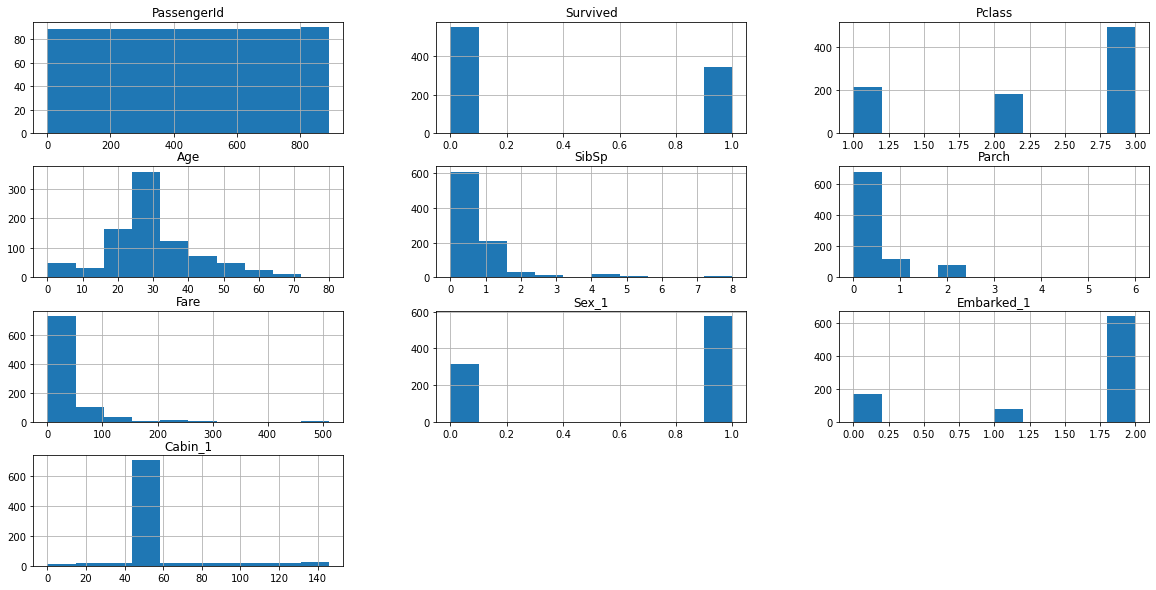

In [139]:
data2.hist( figsize = (20 , 10))

In [102]:
dataN = data2.drop( columns = [ 'Name' ,  'Sex' , 'Ticket' , 'Cabin' , 'Embarked' ])

In [ ]:
dataN

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Cabin_1
0,1,0,3,22,1,0,7,1,3,0
1,2,1,1,38,1,0,71,0,1,74
2,3,1,3,26,0,0,7,0,3,0
3,4,1,1,35,1,0,53,0,3,50
4,5,0,3,35,0,0,8,1,3,0
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39,0,5,29,0,2,0
886,887,0,2,27,0,0,13,1,3,0
887,888,1,1,19,0,0,30,0,3,27
889,890,1,1,26,0,0,30,1,1,54


Data Normalization

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
dataNarr = min_max_scaler.fit_transform(dataN)

In [ ]:
data3 = pd.DataFrame( dataNarr , columns = dataN.columns)

In [ ]:
data3

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Cabin_1
0,0.000000,0.0,1.0,0.2750,0.2,0.000000,0.013672,1.0,1.000000,0.000000
1,0.001124,1.0,0.0,0.4750,0.2,0.000000,0.138672,0.0,0.333333,0.552239
2,0.002247,1.0,1.0,0.3250,0.0,0.000000,0.013672,0.0,1.000000,0.000000
3,0.003371,1.0,0.0,0.4375,0.2,0.000000,0.103516,0.0,1.000000,0.373134
4,0.004494,0.0,1.0,0.4375,0.0,0.000000,0.015625,1.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
709,0.994382,0.0,1.0,0.4875,0.0,0.833333,0.056641,0.0,0.666667,0.000000
710,0.995506,0.0,0.5,0.3375,0.0,0.000000,0.025391,1.0,1.000000,0.000000
711,0.996629,1.0,0.0,0.2375,0.0,0.000000,0.058594,0.0,1.000000,0.201493
712,0.998876,1.0,0.0,0.3250,0.0,0.000000,0.058594,1.0,0.333333,0.402985
